<a href="https://colab.research.google.com/github/treydrummond/Python-Song-Emotion-Assigner/blob/main/CapStone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devdope/900k-spotify")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '900k-spotify' dataset.
Path to dataset files: /kaggle/input/900k-spotify


In [ ]:
import pandas as pd

# Load and clean data
df = pd.read_csv('spotify_dataset.csv', engine='python', on_bad_lines='skip')
df = df[['Artist(s)','song','text','emotion']].dropna()

In [ ]:
# Initialize variables
X = df['text']
y = df['emotion']

In [ ]:
df['text'] = df['text'].astype(str).str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Drop headers from lyrics so song structure does not effect classification
headers = {'chorus', 'bridge', 'verse', 'intro'}
def remove_headers(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in headers]
    return ' '.join(filtered)

df['text'] = df['text'].apply(remove_headers)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Vectorize data
vectorizer = TfidfVectorizer(stop_words="english",
                             max_features=20000,
                             ngram_range=(1,2))
X = vectorizer.fit_transform(df['text'])

# Balance the dataset, needed for the lack of representation from fear
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=3)

# Train LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.64      0.62      0.63       277
        fear       0.94      1.00      0.97       318
         joy       0.66      0.60      0.63       335
        love       0.95      1.00      0.98       312
     sadness       0.70      0.70      0.70       302
    surprise       1.00      1.00      1.00       291

    accuracy                           0.82      1835
   macro avg       0.81      0.82      0.82      1835
weighted avg       0.81      0.82      0.82      1835



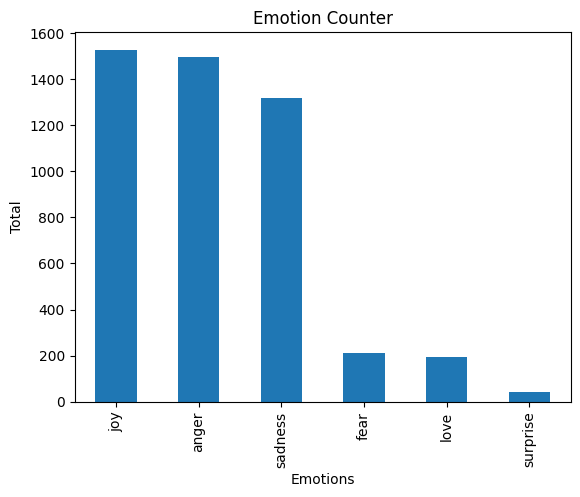

In [ ]:
import matplotlib.pyplot as plt
emotion_counter = df["emotion"].value_counts()
emotion_counter.plot(kind="bar")
plt.xlabel("Emotions")
plt.ylabel("Total")
plt.title("Emotion Counter")
plt.show()

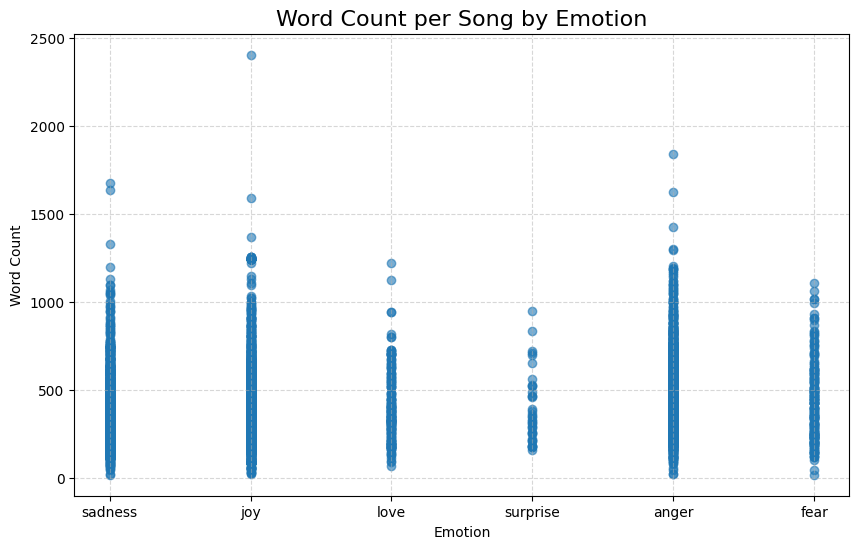

In [ ]:
df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.scatter(df["emotion"], df["word_count"], alpha=0.6)

plt.title("Word Count per Song by Emotion", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Word Count")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [ ]:
#example Hotel by Eagles

text = """On a dark desert highway, cool wind in my hair
Warm smell of colitas, rising up through the air
Up ahead in the distance, I saw a shimmering light
My head grew heavy and my sight grew dim
I had to stop for the night
There she stood in the doorway
I heard the mission bell
And I was thinking to myself
"This could be Heaven or this could be Hell"
Then she lit up a candle and she showed me the way
There were voices down the corridor
I thought I heard them say

Welcome to the Hotel California
Such a lovely place (Such a lovely place)
Such a lovely face
Plenty of room at the Hotel California
Any time of year (Any time of year)
You can find it here

Her mind is Tiffany-twisted, she got the Mercedes bends
She got a lot of pretty, pretty boys she calls friends
How they dance in the courtyard, sweet summer sweat
Some dance to remember, some dance to forget

So I called up the Captain
"Please bring me my wine."
He said, "We haven't had that spirit here since nineteen sixty nine."
And still those voices are calling from far away
Wake you up in the middle of the night
Just to hear them say

Welcome to the Hotel California
Such a lovely place (Such a lovely place)
Such a lovely face
They livin' it up at the Hotel California
What a nice surprise (what a nice surprise)
Bring your alibis

Mirrors on the ceiling
The pink champagne on ice
And she said "We are all just prisoners here, of our own device"
And in the master's chambers
They gathered for the feast
They stab it with their steely knives
But they just can't kill the beast

Last thing I remember
I was running for the door
I had to find the passage back to the place I was before
"Relax," said the night man
"We are programmed to receive
You can check-out any time you like
But you can never leave!" """

prediction = pipeline.predict([text])
print(f"Predicted Mood: {prediction[0]}")

Predicted Mood: love
